In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows

In [2]:
## Data Gathering

# Import CSV
df = pd.read_csv('../Data/predictive_maintenance_dataset.csv')

print(df.shape)
display(df.head(100))

(124494, 12)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,1/1/2015,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,1/1/2015,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,1/1/2015,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,1/1/2015,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,1/1/2015,S1F02DZ2,0,116440096,0,378,9,9,407905,0,0,170


check nulls


,null_count,null_count_percentage


rec_count per categorical columns


failure
0    124388
1       106
Name: failure, dtype: int64

check stats numerical cols


,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


check histogram num cols


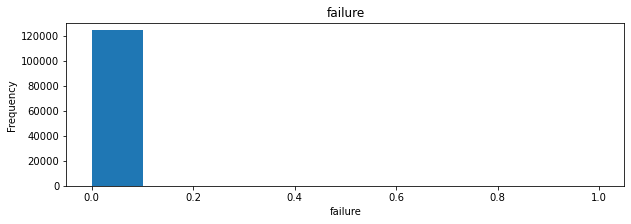

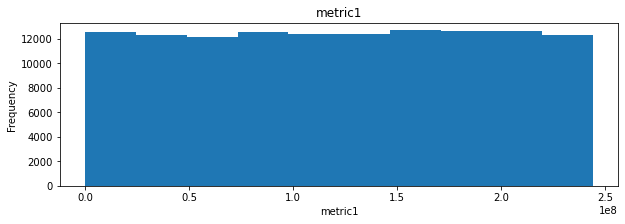

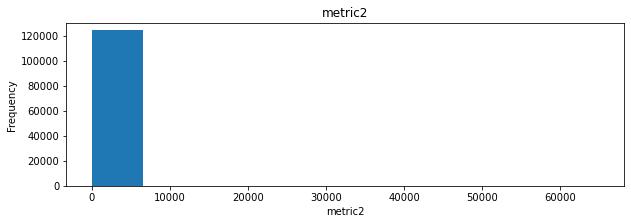

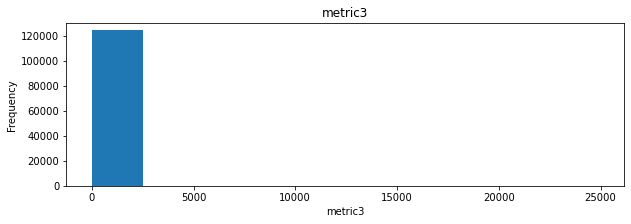

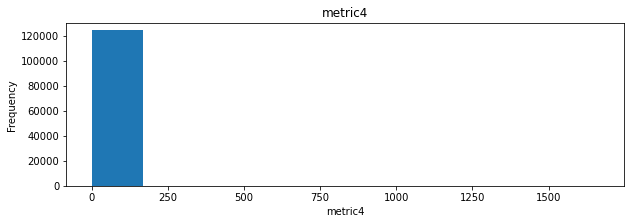

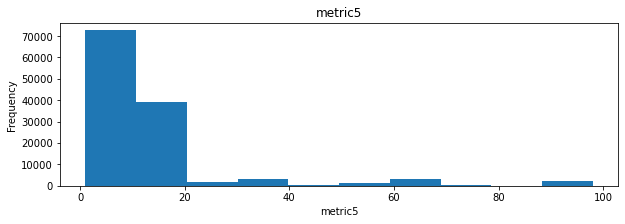

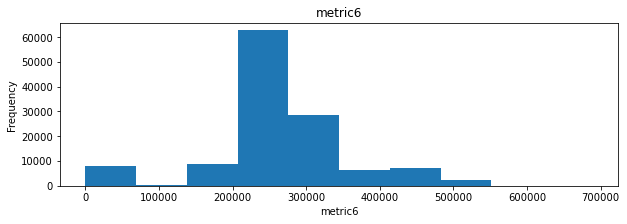

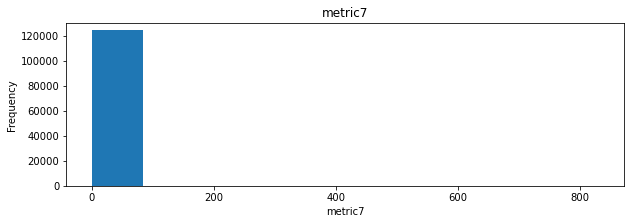

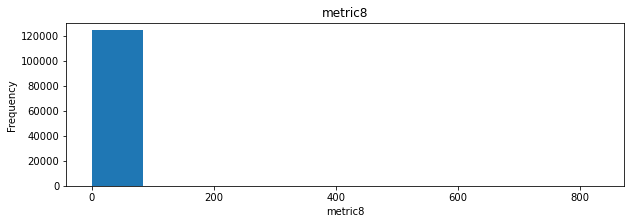

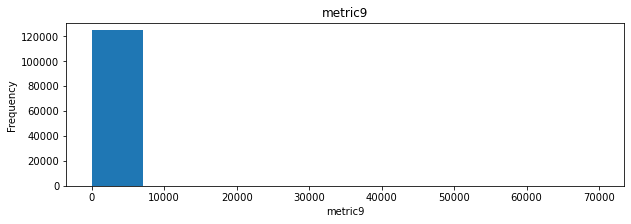

<Figure size 576x432 with 0 Axes>

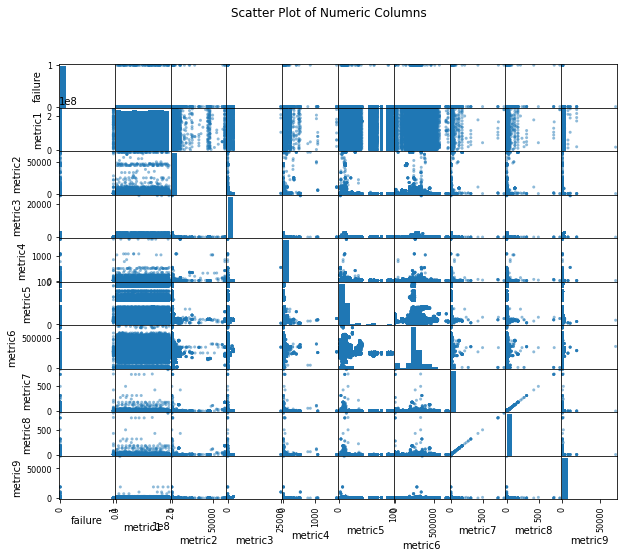

Correlation Matrix:


,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
failure,1.000000,0.001983,0.052901,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001067
metric1,0.001983,1.000000,-0.004254,0.003701,0.001836,-0.003376,-0.001522,0.000151,0.000151,-0.002256
metric2,0.052901,-0.004254,1.000000,-0.002617,0.146762,-0.013999,-0.026350,0.141366,0.141366,-0.002049
metric3,-0.000948,0.003701,-0.002617,1.000000,0.097452,-0.006697,0.009031,-0.001884,-0.001884,0.369579
metric4,0.067398,0.001836,0.146762,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.024892
metric5,0.002270,-0.003376,-0.013999,-0.006697,-0.009773,1.000000,-0.017049,-0.009384,-0.009384,0.003591
metric6,-0.000550,-0.001522,-0.026350,0.009031,0.024870,-0.017049,1.000000,-0.012207,-0.012207,0.016566
metric7,0.119055,0.000151,0.141366,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.004684
metric8,0.119055,0.000151,0.141366,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.004684
metric9,0.001067,-0.002256,-0.002049,0.369579,0.024892,0.003591,0.016566,0.004684,0.004684,1.000000


check outliers


'\nRemarks:\n    No null values\n    Metric 1 has uniform distribution, indicates low variance, consider dropping\n    Metric 2,3,4,7,8,9 has narrow distribution, indicates existence of outliers, handle outlier\n    Failure has an imbalance distribution (106:124388), do data balancing using SMOTE and Tomek Links\n    Metric 7 and 8 have a very high correlation, consider only keeping 1\n'

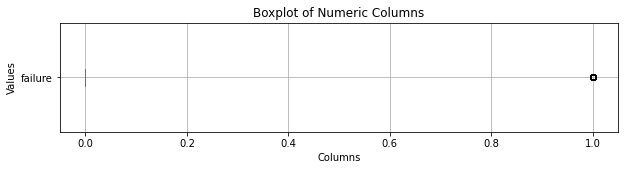

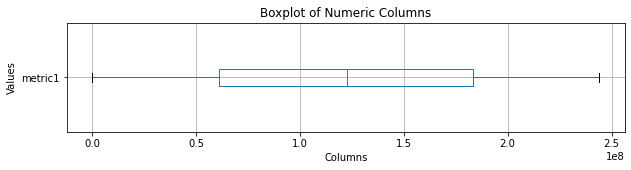

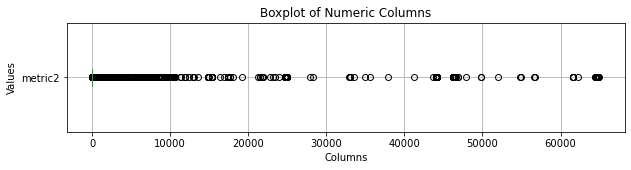

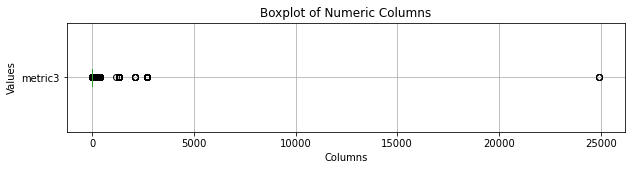

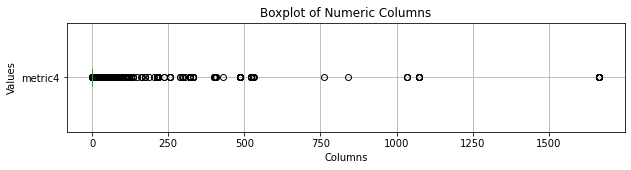

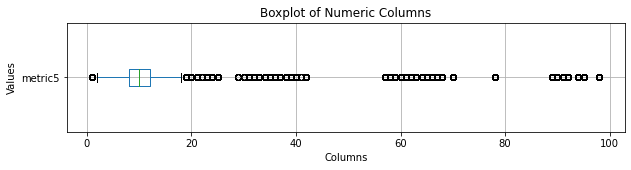

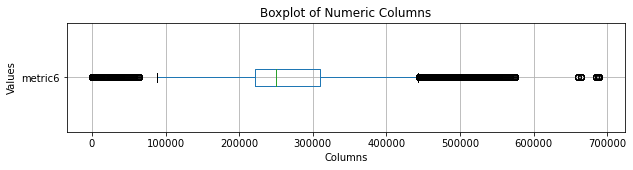

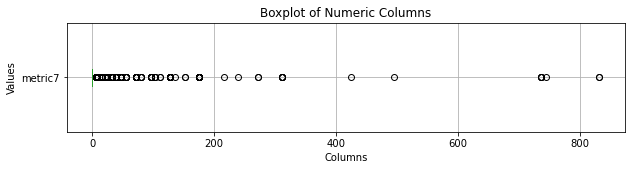

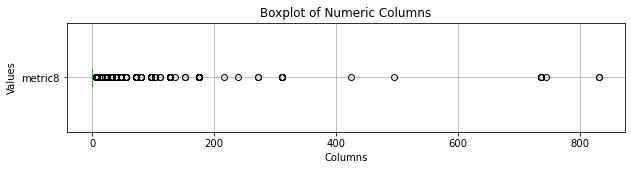

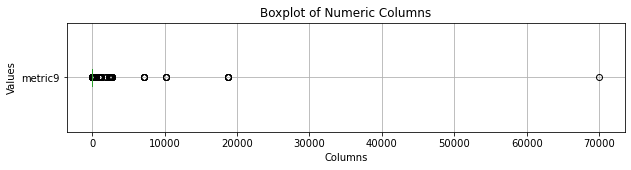

In [3]:
## Data Exploration

# Check for null values
def check_nulls(_df):
    print('check nulls')
    _df_out = pd.DataFrame([])
    _df_out['null_count'] = _df.isna().sum()
    _df_out['null_count_percentage'] = _df.isna().sum() / _df.shape[0]
    display(_df_out[_df_out['null_count'] > 0])
check_nulls(df)

# Check contents of categorical columns
def check_count_categorical_cols(_df, _max_unique=10):
    print('rec_count per categorical columns')
    _cat_cols = _df

    for _col_name in _cat_cols.columns:
        _col = _cat_cols[_col_name]

        if _col.nunique() <= _max_unique:
            _df_out = _col.groupby(_col, dropna=False).size().sort_values(ascending=False)
            display(_df_out)
check_count_categorical_cols(df)

# Check stats of numerical columns
def check_stats_num_cols(_df):
    print('check stats numerical cols')
    display(_df.describe())
check_stats_num_cols(df)

# Check histogram num cols
def check_histo_num_cols(_df):
    print('check histogram num cols')
    # Select numeric columns
    numeric_cols = _df.select_dtypes(include='number')

    # Create histograms for numeric columns
    for column in numeric_cols:
        plt.figure(figsize=(10, 3))
        plt.hist(_df[column])
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
check_histo_num_cols(df)

# Check Correlation
def check_pairwise_correlation(_df):
    # Select numeric columns
    numeric_cols = _df.select_dtypes(include='number')

    # Create scatter plots for pairwise comparison of numeric columns
    plt.figure(figsize=(8, 6))
    pd.plotting.scatter_matrix(_df[numeric_cols.columns], figsize=(10, 8))
    plt.suptitle('Scatter Plot of Numeric Columns')
    plt.show()

    # Calculate the correlation matrix
    correlation_matrix = _df.corr()
    
    print("Correlation Matrix:")
    display(correlation_matrix)
check_pairwise_correlation(df)

# Check boxplot num cols
def check_boxplot_num_cols(_df):
    print('check outliers')
    # Select numeric columns
    numeric_cols = _df.select_dtypes(include='number')

    # Create boxplot for numeric columns
    for column in numeric_cols:

        plt.figure(figsize=(10, 2))
        _df.boxplot(column=column, vert=False)
        plt.title('Boxplot of Numeric Columns')
        plt.xlabel('Columns')
        plt.ylabel('Values')
check_boxplot_num_cols(df)

'''
Remarks:
    No null values
    Metric 1 has uniform distribution, indicates low variance, consider dropping
    Metric 2,3,4,7,8,9 has narrow distribution, indicates existence of outliers, handle outlier
    Failure has an imbalance distribution (106:124388), do data balancing using SMOTE and Tomek Links
    Metric 7 and 8 have a very high correlation, consider only keeping 1
'''

In [13]:
# Handle Outliers

# Replace outliers to bounds
def replace_outliers_with_bounds(_df_with_outliers):

    _df = _df_with_outliers

    # Calculate interquartile range (IQR) to identify outliers
    Q1 = _df.quantile(0.25)
    Q3 = _df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and replace outliers with upper and lower bounds
    for column in _df.columns:
        outliers_low = _df[column] < lower_bound[column]
        outliers_high = _df[column] > upper_bound[column]

        _df.loc[outliers_low, column] = lower_bound[column]
        _df.loc[outliers_high, column] = upper_bound[column]

    return _df
df_post_outlier = replace_outliers_with_bounds(df[['metric3','metric2']])
display(df_post_outlier.head(100))

X: (124494, 11) Y: (124494, 1)
Train set size: (74696, 11)
Validation set size: (24899, 11)
Test set size: (24899, 11)
